In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

from lib.camera import OAKDCamera
       
camera = OAKDCamera()


[1844301061FA930F00] [3.1] [0.763] [ColorCamera(3)] [warning] Unsupported resolution set for detected camera OV9782, needs 800_P or 720_P. Defaulting to 800_P


308


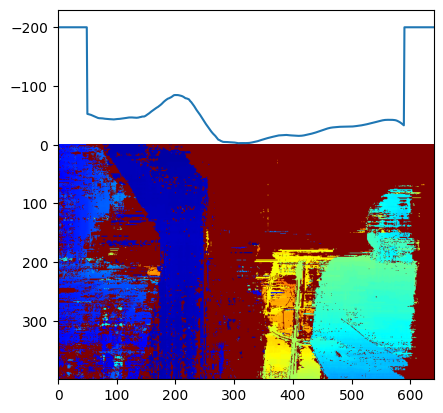

In [334]:
depth = camera.get_depth()
depth_color = cv2.applyColorMap(depth, cv2.COLORMAP_JET)

# plt.imshow(depth)

depth_norm = depth/255 # Normalize depth to 0-1
depth_exp = 1 - np.exp(-5*depth_norm) # Apply exponential function, 0-1

depth_thresh = 0.25
depth_exp[depth_exp < depth_thresh] = 0 # Threshold depth

depth_exp_color = cv2.applyColorMap((depth_exp*255).astype(np.uint8), cv2.COLORMAP_JET)


from scipy import stats

# Get histogram in the horizontal direction
hist = np.sum(depth_exp, axis=0)





# Smooth the histogram
hist = np.convolve(hist, np.ones(50)/200, mode='same')

# Crop the left and right edges
hist[:50] = 200
hist[-50:] = 200

# Find the lastest minimum continous value
min_idx = np.argmin(hist)

print(min_idx)


# Show the histogram
plt.imshow(depth_exp_color)
plt.plot(-hist)